## Introducción
En el presente proyecto se busca analizar hipótesis de propuesta de marketing que podrían ayudar a aumentar los ingresos de la empresa. Para ello se priorizará las hipótesis para posteriormente realizar un test A/B. Se cuenta con una tabla donde se lista las hipótesis planteadas y la valoración en los aspectos de alcance, impacto, confianza y esfuerzo. Además una tabla de las visitas realizadas por usuarios de ambos grupos (A/B) y una tabla de las órdenes obtenidas durante el estudio.

# Preparación de datos

In [1]:
#Importación de librerias
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carga de datos
data_hipotesis= pd.read_csv("/datasets/hypotheses_us.csv", sep=";",dtype={'Hypothesis': 'category'})
data_hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Hypothesis  9 non-null      category
 1   Reach       9 non-null      int64   
 2   Impact      9 non-null      int64   
 3   Confidence  9 non-null      int64   
 4   Effort      9 non-null      int64   
dtypes: category(1), int64(4)
memory usage: 797.0 bytes


In [3]:
data_hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
# función para cambio de nombres
def change_names(columnas_name):
    new_col_names=[]
    for old_name in columnas_name:
        name_stripped = old_name.strip()
        name_lowered = name_stripped.lower()
        name_no_spaces = name_lowered.replace(" ","_")
        new_col_names.append(name_no_spaces)
    return new_col_names

In [5]:
data_hipotesis.columns=change_names(data_hipotesis.columns) # corrigiendo nombre de columnas

Hay 9 hipótesis cada una con sus puntuaciones de alcance, impacto, confianza y esfuerzo.

In [6]:
data_ordenes= pd.read_csv("/datasets/orders_us.csv",dtype={'group': 'category'},parse_dates=["date"])
data_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.8 KB


In [7]:
data_ordenes.sample(5)

,transactionId,visitorId,date,revenue,group
600,160345536,2445878741,2019-08-09,10.6,B
1061,1892286239,1388079388,2019-08-11,10.5,A
2,2961555356,4069496402,2019-08-15,10.2,A
865,549769193,1420364840,2019-08-30,80.7,B
456,543654048,2458001652,2019-08-06,25.9,A


In [8]:
data_ordenes.duplicated().sum() # revisando duplicados

0

In [9]:
data_ordenes["group"].unique() # grupos

['B', 'A']
Categories (2, object): ['B', 'A']

In [12]:
data_ordenes.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


La compra promedio es 131.49 con una desviación estándar de 603, el valor mínimo es de 5 y un máximo de 19920. Estos valores tienen un rango muy grande.

En la tabla data_ordenes no hay valore nulos, ni duplicados.

In [18]:
data_visitas= pd.read_csv("/datasets/visits_us.csv",dtype={'group': 'category'},parse_dates=["date"])
data_visitas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [19]:
data_visitas.sample(5)

,date,group,visits
4,2019-08-05,A,756
14,2019-08-15,A,628
2,2019-08-03,A,507
55,2019-08-25,B,679
23,2019-08-24,A,395


In [20]:
data_visitas.duplicated().sum() # revisando duplicados

0

In [22]:
data_visitas.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


El promedio de visitas por día es de 607 con una desviación estándar de 114.4, un valor mínimo de 361 y máximo de 770.

En la tabla data_visitas no hay valores nulos, ni duplicados.

# Parte 1. Priorizar hipótesis

## Framework ICE para priorizar hipótesis. 

In [23]:
data_hipotesis["ice"]= data_hipotesis["impact"]*data_hipotesis["confidence"] / data_hipotesis["effort"]

In [24]:
data_hipotesis

,hypothesis,reach,impact,confidence,effort,ice
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000


In [25]:
data_hipotesis.iloc[8,0]

'Launch a promotion that gives users discounts on their birthdays'

La hipótesis con mayor puntaje es "Lanzar una promoción que otorgue descuentos a los usuarios en sus cumpleaños"

In [26]:
data_ice=data_hipotesis.sort_values(by="ice", ascending = False).reset_index()
display(data_ice)

,index,hypothesis,reach,impact,confidence,effort,ice
0,8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
1,0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
2,7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
3,6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
4,2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
5,1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
6,5,Add a customer review page. This will increase...,3,2,2,3,1.333333
7,3,Change the category structure. This will incre...,8,3,3,8,1.125000
8,4,Change the background color on the main page. ...,3,1,1,1,1.000000


## Framework RICE para priorizar hipótesis

In [27]:
data_hipotesis["rice"]= data_hipotesis["reach"]*data_hipotesis["impact"]*data_hipotesis["confidence"] / data_hipotesis["effort"]

In [28]:
data_rice=data_hipotesis.sort_values(by="rice", ascending = False).reset_index()
display(data_rice)

,index,hypothesis,reach,impact,confidence,effort,ice,rice
0,7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
1,2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
2,0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
3,6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
4,8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
5,3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
6,1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
7,5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
8,4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [29]:
data_hipotesis.iloc[7,0]

'Add a subscription form to all the main pages. This will help you compile a mailing list'

La hipótesis con mayor puntaje es : "Agregar un formulario de suscripción a todas las páginas principales. Esto te ayudará a compilar una lista de correo electrónico"

## Comparación ICE vrs RICE

In [30]:

data = {'Prioridad': [1, 2, 3, 4, 5, 6, 7, 8, 9],
        'Hipotesis_ice': data_ice["hypothesis"],
       'Hipotesis_rice': data_rice["hypothesis"]}
df = pd.DataFrame(data, index=range(9))
pd.set_option('display.max_colwidth', None)

# Mostrar DataFrame
display(df)

,Prioridad,Hipotesis_ice,Hipotesis_rice
0,1,Launch a promotion that gives users discounts on their birthdays,Add a subscription form to all the main pages. This will help you compile a mailing list
1,2,Add two new channels for attracting traffic. This will bring 30% more users,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
2,3,Add a subscription form to all the main pages. This will help you compile a mailing list,Add two new channels for attracting traffic. This will bring 30% more users
3,4,Show banners with current offers and sales on the main page. This will boost conversion,Show banners with current offers and sales on the main page. This will boost conversion
4,5,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,Launch a promotion that gives users discounts on their birthdays
5,6,Launch your own delivery service. This will shorten delivery time,Change the category structure. This will increase conversion since users will find the products they want more quickly
6,7,Add a customer review page. This will increase the number of orders,Launch your own delivery service. This will shorten delivery time
7,8,Change the category structure. This will increase conversion since users will find the products they want more quickly,Add a customer review page. This will increase the number of orders
8,9,Change the background color on the main page. This will increase user engagement,Change the background color on the main page. This will increase user engagement


La priorización de hipótesis cambia debido al puntaje del alcance que si considera el indicador Rice, teniendo en cuenta que se busca aumentar los ingresos es importante considera el mayor alcance posible, asi mismo el impacto y confianza principalmente.
Por ello se priorizará la hipótesis con mayor rice.


# Parte 2. Análisis de test A/B

In [31]:
#Revisar usuarios únicos en cada grupo

id_A= data_ordenes[data_ordenes["group"]=="A"]["visitorId"].unique()
id_B= data_ordenes[data_ordenes["group"]=="B"]["visitorId"].unique()


In [32]:
valores_repetidos = pd.Series(list(set(id_A).intersection(set(id_B))))
print(valores_repetidos)

0     3957174400
1     3984495233
2     2780786433
3     1294878855
4     1648269707
5     1614305549
6     4120364173
7      232979603
8      199603092
9     4266935830
10    2712142231
11    2587333274
12    2716752286
13    3891541246
14    1668030113
15    2654030115
16    3234906277
17    1230306981
18    1404934699
19    3803269165
20    2949041841
21     237748145
22     457167155
23    2927087541
24    1738359350
25    3062433592
26    3656415546
27     818047933
28     393266494
29     963407295
30     471551937
31    2579882178
32    3202540741
33    2686716486
34    1333886533
35    2044997962
36    3941795274
37    1801183820
38    2378935119
39    4256040402
40    4069496402
41    3766097110
42       8300375
43     351125977
44    1602967004
45     276558944
46    2038680547
47    3951559397
48    3963646447
49    4186807279
50    3717692402
51    1959144690
52    2458001652
53    2600415354
54    2954449915
55    1316129916
56     477780734
57    3972127743
dtype: int64


Hay 56 usuarios que se encuentran en ambos grupos, los cuales se excluirán del análisis ya que podrían variar los resultados si los mantenemos.

In [33]:
data_ordenes=data_ordenes[~(data_ordenes["visitorId"].isin(valores_repetidos))] # valores filtrados sin id_visitors repetidos
print(data_ordenes)


      transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     30.4     B
1        2804400009  3642806036 2019-08-15     15.2     B
3        3797467345  1196621759 2019-08-15    155.1     B
4        2282983706  2322279887 2019-08-15     40.5     B
5         182168103   935554773 2019-08-15     35.0     B
...             ...         ...        ...      ...   ...
1191     3592955527   608641596 2019-08-14    255.7     B
1192     2662137336  3733762160 2019-08-14    100.8     B
1193     2203539145   370388673 2019-08-14     50.1     A
1194     1807773912   573423106 2019-08-14    165.3     A
1196     3936777065  2108080724 2019-08-15   3120.1     B

[1016 rows x 5 columns]


## Analiza el test A/B: Representa gráficamente el ingreso acumulado por grupo. 

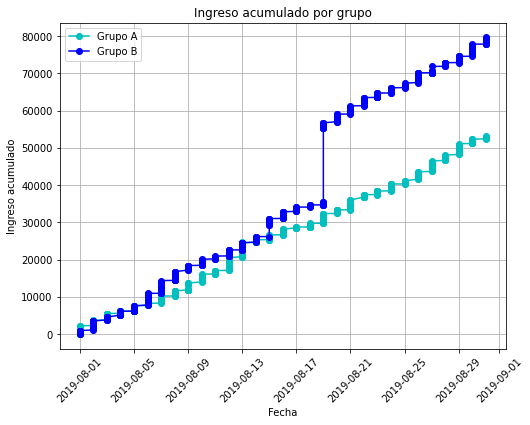

In [34]:
#filtrando tablas por grupos y calculando suma acumulada
data_ordenes_a=data_ordenes[data_ordenes["group"]=="A"].sort_values(by="date")
data_ordenes_a["ingreso_acumulado"] = data_ordenes_a["revenue"].cumsum()
data_ordenes_b=data_ordenes[data_ordenes["group"]=="B"].sort_values(by="date")
data_ordenes_b["ingreso_acumulado"] = data_ordenes_b["revenue"].cumsum()

# Crear el gráfico de líneas
plt.figure(figsize=(8, 6))  # Tamaño  del gráfico
plt.plot(data_ordenes_a["date"],data_ordenes_a["ingreso_acumulado"],marker='o', color='c', linestyle='-',label='Grupo A') # Plot de los datos con marcadores 'o' y línea sólida
plt.plot(data_ordenes_b["date"],data_ordenes_b["ingreso_acumulado"],marker='o', color='b', linestyle='-',label='Grupo B') # Plot de los datos con marcadores 'o' y línea sólida

plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Ingreso acumulado')  # Etiqueta del eje Y
plt.title('Ingreso acumulado por grupo')  # Título del gráfico
plt.xticks(rotation=45)
plt.legend()  # Mostrar leyenda
plt.grid(True)  # Mostrar rejilla
plt.show()  # Mostrar el gráfico


Se Observa que el ingreso acumulado del grupo B es  mayor que el grupo A al pasar los días. Hay un salto especifico en una fecha y luego tiene un crecimiento similar que el Grupo A.
Puede deberse a una compra inusual, sin embargo el grupo B parece generar mejores ingresos que el grupo A.


In [35]:
datesGroups = data_ordenes[['date','group']].drop_duplicates() 


In [36]:
# Convertir la columna 'group' a una columna categórica ordenada
data_ordenes['group'] = data_ordenes['group'].astype('category').cat.as_ordered()

# Aplicar la función de agregación a cada fila de datesGroups
ordersAggregated = datesGroups.apply(lambda x: 
    data_ordenes[
        (data_ordenes['date'] <= x['date']) & 
        (data_ordenes['group'] == x['group'])
    ].agg({
        'date': 'max',
        'group': 'max',  # Mantener la columna 'group'
        'transactionId': pd.Series.nunique,
        'visitorId': pd.Series.nunique,
        'revenue': 'sum'
    }), 
    axis=1
)

# Ordenar los resultados por fecha y grupo
ordersAggregated = ordersAggregated.sort_values(by=['date', 'group'])

In [37]:
print(ordersAggregated)

          date group  transactionId  visitorId  revenue
55  2019-08-01     A             23         19   2266.6
66  2019-08-01     B             17         17    967.2
175 2019-08-02     A             42         36   3734.9
173 2019-08-02     B             40         39   3535.3
291 2019-08-03     A             66         60   5550.1
..         ...   ...            ...        ...      ...
533 2019-08-29     B            510        490  74576.7
757 2019-08-30     A            460        437  52363.7
690 2019-08-30     B            531        511  77863.5
958 2019-08-31     A            468        445  53212.0
930 2019-08-31     B            548        528  79651.2

[62 rows x 5 columns]


In [38]:
#  fusiona las dos tablas en una y da a sus columnas nombres descriptivos 

cumulativeData = ordersAggregated.merge(data_visitas, left_on=['date', 'group'], right_on=['date', 'group']) 

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] 

print(cumulativeData.head(5))



        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9       619
3 2019-08-02     B      40      39   3535.3       581
4 2019-08-03     A      66      60   5550.1       507


In [39]:
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']] 

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B 

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']] 

print(cumulativeRevenueA)

         date  revenue  orders
0  2019-08-01   2266.6      23
2  2019-08-02   3734.9      42
4  2019-08-03   5550.1      66
6  2019-08-04   6225.6      77
8  2019-08-05   7623.6      99
10 2019-08-06   8292.0     114
12 2019-08-07  10234.0     130
14 2019-08-08  11638.8     144
16 2019-08-09  13734.0     155
18 2019-08-10  16121.5     170
20 2019-08-11  17084.9     181
22 2019-08-12  20533.7     200
24 2019-08-13  24630.6     214
26 2019-08-14  25347.2     231
28 2019-08-15  26622.5     241
30 2019-08-16  28221.6     259
32 2019-08-17  28770.1     265
34 2019-08-18  29735.7     278
36 2019-08-19  32389.3     299
38 2019-08-20  33325.3     309
40 2019-08-21  36004.2     329
42 2019-08-22  37455.1     339
44 2019-08-23  38409.2     359
46 2019-08-24  40321.3     372
48 2019-08-25  41139.5     380
50 2019-08-26  43604.3     396
52 2019-08-27  46539.0     419
54 2019-08-28  48065.9     434
56 2019-08-29  51134.8     451
58 2019-08-30  52363.7     460
60 2019-08-31  53212.0     468


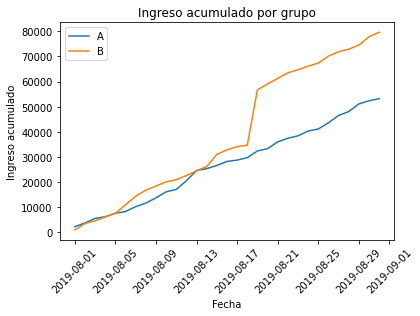

In [40]:
# Trazar el gráfico de ingresos del grupo A 

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A') 


# Trazar el gráfico de ingresos del grupo B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B') 

plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Ingreso acumulado')  # Etiqueta del eje Y
plt.title('Ingreso acumulado por grupo')  # Título del gráfico
plt.xticks(rotation=45)
plt.legend()

## Representa gráficamente el tamaño de pedido promedio acumulado por grupo.

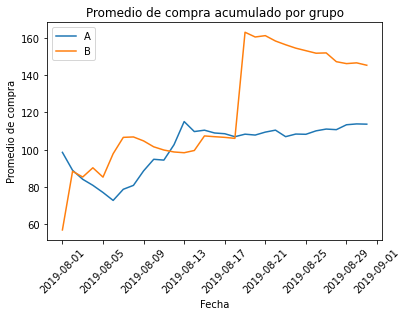

In [41]:
#promedio de compra por grupo
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A') 

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B') 
plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Promedio de compra')  # Etiqueta del eje Y
plt.title('Promedio de compra acumulado por grupo')  # Título del gráfico
plt.xticks(rotation=45)
plt.legend()



Ambos grupos tienen picos en su compra promedio en ciertos puntos. 
El tamaño de compra promedio se estabiliza un poco al final del gráfico: se estabiliza para el grupo A y empieza a caer para el grupo B. Necesitamos más datos sobre este grupo para encontrar el verdadero tamaño promedio de compra y establecer su nivel.

## Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.


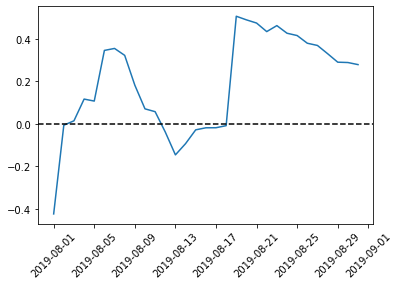

In [42]:
# reunir los datos en un DataFrame 
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 

# trazar un gráfico de diferencia relativa para los tamaños de compra promedio 
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1) 

# agregar el eje X 
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')



La diferencia relativa en algunos puntos es positiva y en otras negativa. Al parecer hay datos anómalos que no permiten ver cual es la tendencia real

## Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. 



In [43]:
# calcular la conversión acumulada 
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

 # seleccionar datos en el grupo A 

cumulativeDataA = cumulativeData[cumulativeData['group']=='A'] 

# seleccionar datos en el grupo B 
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'] 


## Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. 

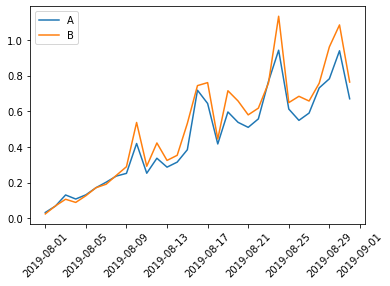

In [44]:
# trazar los gráficos 

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A') 

plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xticks(rotation=45)
plt.legend() 
    
# establecer la escala de los ejes plt.axis(["2019-04-01", '2019-04-23', 0, 0.015])

El grupo B tiene una tasa de conversión ligeramente mayor que el grupo B. Ambas tasas presentan crecimientos com puntos altos y bajos.

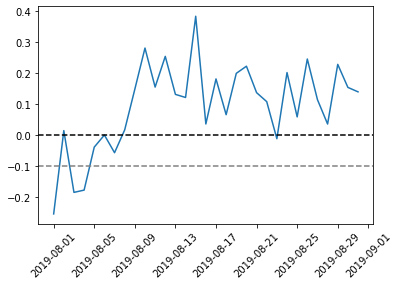

In [45]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']) 

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1) 
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=-0.1, color='grey', linestyle='--')


Muestra que la tasa de conversión relativa es positiva

## Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


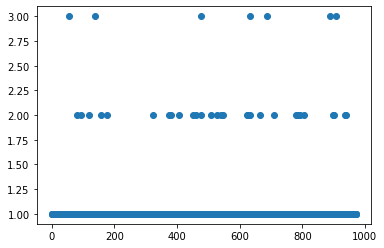

In [46]:
ordersByUsers = (
    data_ordenes.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0, len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])


## Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.


In [47]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))


[1. 1. 2.]


Esto indica que el 95% de los usuarios realizaron 1 o menos órdenes, y no más del 1% realizaron más de 2 pedidos. Solo el 5% realizó más de 1 orden, desde ahi se convierte en anomalía.

## Traza un gráfico de dispersión de los precios de los pedidos. 


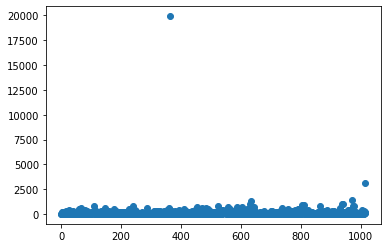

In [48]:

x_values = pd.Series(range(0, len(data_ordenes['revenue'])))
plt.scatter(x_values, data_ordenes['revenue'])


Hay dos valores atipicos que son notables en el gráfico de dispersión, los precios de los pedidos oscilas regularmente entre 0 y 2500.

## Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.


In [49]:
print(np.percentile(data_ordenes['revenue'], [90,95, 99]))

[280.8   414.275 830.3  ]


El 5 % de los pedidos tienen un precio superior a 414, y el 1% de los pedidos tiene un precio superior de 830.3.
Solo el 5% está por encima de 280.8, a partir de ahi será el punto de anomalía.

## Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.


In [50]:
#Calculemos la significancia estadística de la diferencia de conversión entre los grupos.
#Crearemos las variables ordersByUsersA y ordersByUsersB para almacenar las columnas ['userId', 'orders']. 
ordersByUsersA = data_ordenes[data_ordenes['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = data_ordenes[data_ordenes['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [51]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data_visitas[data_visitas['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)


sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data_visitas[data_visitas['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)



In [52]:
print(sampleA)
print(sampleB)

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64
0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18916, dtype: int64


In [53]:

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))
# alfa = 0.05

0.011
0.160


Conclusión: según los datos sin procesar, hay diferencia entre los grupos A y B.
La primera fila de la salida nos da el valor p 0.011, que es menor que 0,05.
Entonces, se rechaza la hipótesis nula,hay una diferencia estadísticamente significativa en la conversión entre los grupos y la ganancia relativa del grupo B es del 16% .


## Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.


In [54]:
print('{0:.3f}'.format(stats.mannwhitneyu(data_ordenes[data_ordenes['group']=='A']['revenue'], data_ordenes[data_ordenes['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(data_ordenes[data_ordenes['group']=='B']['revenue'].mean()/data_ordenes[data_ordenes['group']=='A']['revenue'].mean()-1))


0.862
0.278


El valor p es notablemente superior a 0,05 por lo que no hay motivo para rechazar la hipótesis nula y concluir que el tamaño medio de los pedidos difiere entre los grupos. Y el tamaño del pedido promedio del grupo B es mayor que el del A.

## Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. 


In [55]:
#filtrando datos

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId']], axis = 0)

usersWithExpensiveOrders = data_ordenes[data_ordenes['revenue'] > 414.275]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()


In [56]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data_visitas[data_visitas['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data_visitas[data_visitas['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.016
0.174


Conclusión: hay diferencia entre los grupos A y B. La primera fila de la salida nos da el valor p 0.021, que es menor que 0,05. Entonces, se rechaza la hipótesis nula,hay una diferencia estadísticamente significativa en la conversión entre los grupos y la ganancia relativa del grupo B es del 17% .

## Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. 

In [57]:
print('{0:.3f}'.format(stats.mannwhitneyu(data_ordenes[np.logical_and(data_ordenes['group']=='A',np.logical_not(data_ordenes['visitorId'].isin(abnormalUsers)))]['revenue'],data_ordenes[np.logical_and(data_ordenes['group']=='B',np.logical_not(data_ordenes['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
print('{0:.3f}'.format(data_ordenes[np.logical_and(data_ordenes['group']=='B',np.logical_not(data_ordenes['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/data_ordenes[np.logical_and(data_ordenes['group']=='A',np.logical_not(data_ordenes['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))


0.771
-0.033


El valor p es 0.677 por lo que  no se rechaza la hipótesis nula, en este caso el valor promedio de B es menor en 3.3%.

## Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 
1. Para la prueba, considera a uno de los grupos como líder. 
2. Para la prueba, concluye que no hay diferencia entre los grupos. 
3. Continúa la prueba.

En este caso paro la prueba, concluyo que hay diferencia entre los grupos pero no puedo determinar con seguridad que sea B, el grupo líder.

Podría significar que aunque más usuarios están convirtiendo en el grupo experimental, los usuarios gastan menos en promedio por transacción
Es posible que el grupo experimental esté atrayendo a usuarios que convierten a una tasa mayor, pero que, por alguna razón, tienden a realizar compras de menor valor en comparación con el grupo de control. Esto podría ser debido a factores como preferencias de productos, niveles de lealtad de los clientes, o efectividad de las estrategias de precios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>

Buen trabajo!
</div> 